# Ejercicios resueltos NLP.

**Notebook 1**

1. Graba un aurdio hablando de algun tema con algún editor de voz del ordenador (4 o 5 frases).  Pásalo a texto con `speech_recognition`, el audio tiene que ser en wav. Si no lo podéis guardar en .wav, puedes convertirlo on-line desde otros formatos (ej. https://audio.online-convert.com/es/convertir-a-wav). 

- Haz una función que pase el audio a texto y lo traduzca a otro idioma. 
Comprueba que lo hace bien ejecutando la función con tu audio y el idioma que quieras. 

In [8]:
def Audio2Trans(audio, lang = 'es', lang_out = 'fr'):
    import speech_recognition as sr
    from googletrans import Translator

    r = sr.Recognizer()
    translator = Translator()
    with sr.AudioFile(audio) as source:
        audio_text = r.listen(source)
        text = r.recognize_google(audio_text, language = lang)
    result = translator.translate(text, src = lang, dest = lang_out)
    return result.text

In [9]:
import IPython
IPython.display.Audio("prueba.wav")

In [10]:
Audio2Trans('prueba.wav', lang = 'es', lang_out = 'ru')

'сегодня я ношу черные брюки и коричневые туфли, синюю куртку и черные очки'

2. Haz una función encuentra el tema del que se habla en un texto, y con parámetros opcionales el idioma y una variable lógica que te haga un plot de la frecuencia de las palabras si es True y que no lo haga si es False. 
Lanza esta función para los textos en data/texto1.txt data/texto2.txt y data/texto3.txt. 

Utiliza `textblob` para detectar el idioma automáticamente. 

In [11]:
!pip3 install textblob

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


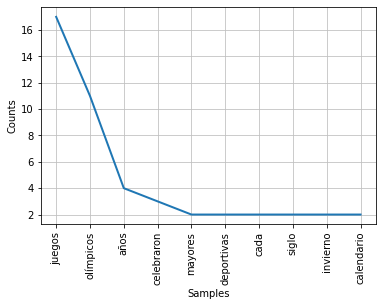

[('juegos', 17), ('olímpicos', 11), ('años', 4), ('celebraron', 3), ('mayores', 2)]


In [12]:
from textblob import TextBlob
from collections import Counter

import nltk
from nltk.corpus import stopwords


def DetectLanguage(text):
    """ Detects language of text """
    a = text.split()
    b = TextBlob(a[0])
    return b.detect_language()

def Words(text, lang = 'english'): 
    """give frequency plot of N most common words in text, 
    removing stopwords of a given langauge" 
       * text : string
       * lang : string optional
       * N    : integer optional """
    tokens = [t for t in text.split()]
    lowercase_tokens = [t.lower() for t in tokens]
    words = [t for t in lowercase_tokens if t.isalpha()]
    stword = stopwords.words(lang)
    stopwords_removed = [t for t in words if t not in stword]
    return stopwords_removed
    
def TopicFinder(text, lang_out = 'spanish', plot = False):
    """Finds topic in spanish of text"""
    from googletrans import Translator
    translator = Translator()
    f = open(text,'r')
    text = f.read()
    lang = DetectLanguage(text)
    result = translator.translate(text, src = lang, dest = lang_out)
    tokens = Words(result.text, lang = lang_out)
    bow = Counter(tokens) 
    if plot:   # exactly the same than plot == True
        freq = nltk.FreqDist(tokens)
        freq.plot(10, cumulative=False)
    print(bow.most_common(5))

TopicFinder('data/texto3.txt', plot = True)

3. Lematiza el texto en data1/texto4.txt usando para cada categoría gramatical (almenos estas tres: nombre, verbos, adjetivo) el argumento opcional adecuado (pos ="v", pos ="a" o pos="n").  Si es un adverbio ("easily") usa `stem`.

In [13]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

f = open('data/texto4.txt','r')
text = f.read()

#text = """Following mice attacks, caring farmers were marching to Delhi for better living conditions. 
#Delhi police on Tuesday fired water cannons and teargas shells at protesting farmers as they tried to 
#break barricades with their cars, automobiles and tractors."""

# Uso la función Words definida antes:
stopwords_removed = Words(text)
lem_tokens = [lemmatizer.lemmatize(t) for t in stopwords_removed]
bag_words = Counter(stopwords_removed)
bag_words2 = Counter(lem_tokens)


from nltk.tag import pos_tag

# miro la categoría gramatical con pos_tag.
# Tendré una lista de tuplas con la palabra y la categoría
 
tagged_tokens = nltk.pos_tag(stopwords_removed)

lem_tokens_v2 = []
for tt in tagged_tokens:
    if 'VB' in tt[1]:       # if it is verb
         ll = lemmatizer.lemmatize(tt[0], pos = 'v')   
    elif 'JJ' in tt[1]:     # if it is adjective
         ll = lemmatizer.lemmatize(tt[0], pos = 'a')
    elif 'NN':              # if it is name
         ll = lemmatizer.lemmatize(tt[0], pos = 'n')
    elif 'RB':              # if is is and adverb
         ll = stemmer.stem(tt[0])
    else:                   #else
         ll = lemmatizer.lemmatize(tt[0])
    lem_tokens_v2.append(ll)

bag_words3 = Counter(lem_tokens_v2)

print(bag_words.most_common(10))
print(bag_words2.most_common(10))
print(bag_words3.most_common(10))

[('batman', 17), ('dc', 6), ('comic', 5), ('character', 5), ('including', 4), ('published', 3), ('kane', 3), ('book', 3), ('comics', 3), ('frequently', 3)]
[('batman', 17), ('comic', 8), ('character', 8), ('dc', 6), ('book', 4), ('including', 4), ('return', 4), ('published', 3), ('kane', 3), ('frequently', 3)]
[('batman', 17), ('comic', 8), ('character', 8), ('dc', 6), ('include', 5), ('book', 4), ('return', 4), ('publish', 3), ('kane', 3), ('feature', 3)]


**Notebook 2**

1. Lee el siguiente archivo data/text_ner.txt y busca la entidad de los nombre que salen en él

In [22]:
import spacy
from spacy import displacy
NER = spacy.load("en_core_web_sm")

In [23]:
f = open('data/text_ner.txt','r')
text = f.read()
text1 = NER(text)
displacy.render(text1, style="ent", jupyter=True)

3. Busca el primer nombre (NN o NNS) y el primer verbo (VB) de ese mismo texto y para cada uno encuentra la acepción que corresponde a ese contexto y escribe la definición y un sinónimo.

In [18]:
texto = " Richard and Sonia Muller make documentaries about wildlife, particularly dangerous animals, like the big cats found in Africa. Film-making for them is a way to bring the message of the importance of understanding wildlife to international audiences, with their last film, Staying Alive, exploring relationships between lions and other wildlife in one African region. When Richard and Sonia were invited to help with a special project run by a wildlife organisation that was providing information about the falling numbers of big cats, especially lions, they immediately agreed to take part."
texto += "Richard grew up near a wildlife park and as a child was keen on filming what he saw. The couple were introduced at university in Cape Town, and quickly realised how much they had in common. They were both curious about the natural world and Sonia soon discovered a similar talent for filmmaking. As a child in South Africa Sonia often ran off alone to explore the wild areas surrounding her home, despite her parents’ fears."
texto += "When asked what they found hardest about their work, Sonia and Richard have the same answer - leaving an area and finishing a project. Sonia adds that the hours required can be hard, and things like the heat, dust, and bugs make it very tiring. The excitement of her work comes from not knowing what will happen, perhaps even discovering something new for science, while Richard takes most interest in spending time with individual animals, getting to know their character."
texto += "The pair visit schools around the world, and notice that students with access to lots of information don’t always have as much understanding about geography as students in countries where access is limited. “Students without the internet constantly available actually look at maps, they want to find out where they are and often end up with a better idea of place,” Richard says. A major part of their work is explaining to students the importance of a fuller understanding of various environments by studying the climate, animals and culture of a specific location."
texto += "If you’d like a similar career, Richard suggests studying various different areas of biology, rather than learning about the latest film- making technology, as an understanding of the natural world will last forever. The couple also give general advice for those wanting to help protect the environment. Sonia explains that it’s important to allow yourself to concentrate. “Turning off personal electronic items gets you closer to the natural world,” she says. “You can watch nature, instead of listening for your mobile phone.” Most importantly they agree that if urgent action isn’t taken, more animals might be lost. However, the fact that more teenagers are getting involved offers some hope for the future."

In [19]:
import nltk
from nltk.tag import pos_tag
# nltk.download('averaged_perceptron_tagger')
tokens = nltk.word_tokenize(text)

list_tokens = nltk.pos_tag(tokens)

In [20]:
list_tokens

[('Batman', 'NNP'),
 ('[', 'VBZ'),
 ('a', 'DT'),
 (']', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('superhero', 'NN'),
 ('who', 'WP'),
 ('appears', 'VBZ'),
 ('in', 'IN'),
 ('American', 'JJ'),
 ('comic', 'JJ'),
 ('books', 'NNS'),
 ('published', 'VBN'),
 ('by', 'IN'),
 ('DC', 'NNP'),
 ('Comics', 'NNPS'),
 ('.', '.'),
 ('The', 'DT'),
 ('character', 'NN'),
 ('was', 'VBD'),
 ('created', 'VBN'),
 ('by', 'IN'),
 ('artist', 'NN'),
 ('Bob', 'NNP'),
 ('Kane', 'NNP'),
 ('and', 'CC'),
 ('writer', 'NN'),
 ('Bill', 'NNP'),
 ('Finger', 'NNP'),
 (',', ','),
 ('and', 'CC'),
 ('debuted', 'VBN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('27th', 'JJ'),
 ('issue', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('comic', 'JJ'),
 ('book', 'NN'),
 ('Detective', 'NNP'),
 ('Comics', 'NNPS'),
 ('on', 'IN'),
 ('March', 'NNP'),
 ('30', 'CD'),
 (',', ','),
 ('1939', 'CD'),
 ('.', '.'),
 ('In', 'IN'),
 ('the', 'DT'),
 ('DC', 'NNP'),
 ('Universe', 'NNP'),
 ('continuity', 'NN'),
 (',', ','),
 ('Batman', 'NNP'),
 ('is', 'VBZ'),
 ('the', '

In [38]:
n = 0; v = 0
for tup in list_tokens:
    if (tup[1] == 'NN' or tup[1] == 'NNS') and n == 0:
        first_name = tup[0]
        n = 1
    elif tup[1] == 'VB' and v == 0:
        first_verb = tup[0]
        v = 1
    if v == 1 and n == 1:
        break
print(first_name, first_verb)

documentaries make


In [48]:
from nltk.corpus import wordnet as wn
syn_name = wn.synsets(first_name)
syn_name

[Synset('documentary.n.01')]

In [ ]:
syn_name = wn.synsets(first_name)[0]
print(f'definition of {syn_name.lemma_names()[0]} is {syn_name.definition()}')
print(f'a synonym of {syn_name.lemma_names()[0]}  is {syn_name.lemma_names()[1]}')


In [63]:
wn.synsets(first_verb)
# Hay muchas acepciones, parece que la que busco no es la primera

[Synset('brand.n.02'),
 Synset('shuffle.n.01'),
 Synset('make.v.01'),
 Synset('make.v.02'),
 Synset('make.v.03'),
 Synset('induce.v.02'),
 Synset('cause.v.01'),
 Synset('produce.v.02'),
 Synset('draw.v.04'),
 Synset('make.v.08'),
 Synset('create.v.05'),
 Synset('gain.v.08'),
 Synset('do.v.08'),
 Synset('form.v.02'),
 Synset('reach.v.07'),
 Synset('make.v.14'),
 Synset('make.v.15'),
 Synset('make.v.16'),
 Synset('construct.v.01'),
 Synset('make.v.18'),
 Synset('make.v.19'),
 Synset('name.v.03'),
 Synset('have.v.17'),
 Synset('reach.v.01'),
 Synset('lay_down.v.01'),
 Synset('make.v.24'),
 Synset('make.v.25'),
 Synset('hold.v.03'),
 Synset('make.v.27'),
 Synset('take.v.27'),
 Synset('stool.v.04'),
 Synset('make.v.30'),
 Synset('make.v.31'),
 Synset('make.v.32'),
 Synset('make.v.33'),
 Synset('make.v.34'),
 Synset('make.v.35'),
 Synset('make.v.36'),
 Synset('make.v.37'),
 Synset('make.v.38'),
 Synset('cook.v.02'),
 Synset('seduce.v.01'),
 Synset('make.v.41'),
 Synset('make.v.42'),
 Synset(

In [64]:
# habría que coger la acepción tercera o indicarle que es un verbo
syn_verb = wn.synsets(first_verb, pos = 'v')[0]

In [65]:
print(f'definition of {syn_verb.lemma_names()[0]} is {syn_verb.definition()}')
print(f'a synonym of {syn_verb.lemma_names()[0]}  is {syn_verb.lemma_names()[1]}')

definition of make is engage in
a synonym of make  is do


4. Definir una función que de una idea de si un texto es en general positivo o negativo. Usando distintas frases para comprobarlo. 

In [24]:
from nltk.corpus import sentiwordnet as swn

# defino función muy simple, que calucle el indice positivo, negativo y objetivo que da sentiwordnet 
# a la primera acepción de la palabra y los sumamos. Luego escojo el que de máximo del positivo o negativo
# para decir si una frase tiene connotación positiva o negativa. Si cogía el máximo me daba siempre neutro, porque
# hay muchas palabras neutras...habría que mejorarlo.

def GoodVibes(text):
    tokens = nltk.word_tokenize(text)
    list_tokens = nltk.pos_tag(tokens)
    # analise only nouns verbs and adjectives
    positive = 0; negative = 0; neutral = 0
    for tt in list_tokens: 
        if 'VB' in tt[1]:       # if it is verb
            syn = wn.synsets(tt[0], pos = 'v')[0] 
            senti_syn = swn.senti_synset(syn.name())   
            positive += senti_syn.pos_score()
            negative += senti_syn.neg_score()
            neutral  += senti_syn.obj_score()
        elif 'JJ' in tt[1]:     # if it is adjective
            syn = wn.synsets(tt[0], pos = 'a')[0] 
            senti_syn = swn.senti_synset(syn.name())   
            positive += senti_syn.pos_score()
            negative += senti_syn.neg_score()
            neutral  += senti_syn.obj_score()    
        elif 'NN' in tt[1]:     # if it is name
            syn = wn.synsets(tt[0], pos = 'n')[0]  
            senti_syn = swn.senti_synset(syn.name())   
            positive += senti_syn.pos_score()
            negative += senti_syn.neg_score()
            neutral  += senti_syn.obj_score()
    l = [positive, negative, neutral]
    print(l)
    if positive > negative: print('La frase es positiva')
    if negative > positive: print('La frase es negativa')
    if negative == positive: print('La noticia es neutra')

In [144]:
GoodVibes('I love weekends')

[0.5, 0.0, 1.5]
La frase es positiva
